# Objectives
YW
* scrape a website for relevant information, store that information to a dataframe and save that dataframe as a csv file
* load in a dataframe and do the following
    * calculate the zscores of a given column
    * calculate the zscores of a point from a given column in the dataframe
    * calculate and plot the pmf and cdf of another column

# Part 1 - Webscraping
* use the following url scrape the first page of results
* for each item get the name of the item
* store the names to a dataframe and save that dataframe to csv then display
    * store the dataframe in the `data` folder in the repo
    * name the file `part1.csv` and make sure that when you write it you set `index=False`
* the head of the dataframe

* it should match the following
<img src="solutions/images/part1.png"/>

In [74]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [4]:
url = "https://www.petsmart.com/dog/treats/dental-treats/#page_name=flyout&category=dog&cta=dentaltreat"

In [6]:
response = requests.request("GET", url)
response.status_code


200

In [8]:
# scrape the data
web_soup = BeautifulSoup(response.content, 'html.parser')

In [15]:
r_list = web_soup.find_all('div', attrs={'class':'product-name'})
r = r_list[0].find('h3').text

In [20]:
data = []
for item in r_list:
    product = {}
    product['name'] = item.find('h3').text
    data.append(product)
data

[{'name': 'Greenies Regular Dental Dog Treats'},
 {'name': 'Greenies Petite Dental Dog Treats'},
 {'name': 'Greenies Large Dental Dog Treats'},
 {'name': 'Pedigree Dentastix Large Dog Treats'},
 {'name': 'Greenies 6 Month+ Puppy Petite Dental Dog Treats'},
 {'name': 'Greenies 6 Month+ Puppy Dental Dog Treats'},
 {'name': 'Greenies 6 Month+ Puppy Teenie Dental Dog Treats'},
 {'name': 'Greenies Teenie Dental Dog Treats'},
 {'name': 'Authority® Dental & DHA Stick Puppy Treats Parsley Mint - Gluten Free, Grain Free'},
 {'name': 'Pedigree Dentastix Large Dog Sticks'},
 {'name': 'Milk-Bone Brushing Chews Large Dental Dog Treats'},
 {'name': 'Pedigree Dentastix Small/Medium Dog Sticks'},
 {'name': 'Pedigree Dentastix Triple Action Dental Dog Treats - Variety Pack'},
 {'name': 'WHIMZEES Variety Value Box Dental Dog Treat - Natural, Grain Free'},
 {'name': 'Pedigree Dentastix Mini Dog Sticks'},
 {'name': 'Virbac® C.E.T.® VeggieDent® Tartar Control Dog Chews'},
 {'name': 'Milk-Bone Brushing Chew

In [21]:
# load the data into a dataframe file
doggy_data = pd.DataFrame(data)

In [22]:
# save the data as a csv file
doggy_data.to_csv('dog_dental', index = False)

In [23]:
# display df.head()
doggy_data.head()

,name
0,Greenies Regular Dental Dog Treats
1,Greenies Petite Dental Dog Treats
2,Greenies Large Dental Dog Treats
3,Pedigree Dentastix Large Dog Treats
4,Greenies 6 Month+ Puppy Petite Dental Dog Treats


# Part 2

load in the csv file located in the `data` folder called `part2.csv`

create a function that calculates the zscores of an array

then calculate the zscores for each column in part2.csv and add them as columns

See below for final result

<img src="solutions/images/part2_df_preview.png"/>

In [25]:
df = pd.read_csv('data/part2.csv')
df.head()

,salaries,NPS Score,eventOutcome
0,44112.0,-7.0,1
1,46777.0,-12.0,2
2,50013.0,50.0,5
3,48983.0,-13.0,0
4,50751.0,-11.0,6


In [29]:
# create a function that calculates the zscores of an array
def get_z(x):
    mean = x.mean()
    std = x.std()
    zscore = []
    for item in x:
        zscore.append((item-mean)/std)
    return zscore

In [32]:
# calculate the zscore for each column and store them as a new column with the names used above
df['salaries_zscores'] = get_z(df['salaries'])
df['NPS Score_zscores'] = get_z(df['NPS Score'])
df['eventOutcome_zscores'] = get_z(df['eventOutcome'])
df.head()

,salaries,NPS Score,eventOutcome,salaries_zscores,NPS Score_zscores,eventOutcome_zscores
0,44112.0,-7.0,1,-1.460155,-0.913522,-1.103166
1,46777.0,-12.0,2,-0.793981,-1.080668,-0.668095
2,50013.0,50.0,5,0.014926,0.991947,0.637118
3,48983.0,-13.0,0,-0.242545,-1.114097,-1.538237
4,50751.0,-11.0,6,0.199405,-1.047239,1.072189


# Part 3 
plot 'salaries' and 'NPS Score' on a subplot (1 row 2 columns) 
then repeat this for the zscores

see image below for reference
<img src="solutions/images/part2-plots.png"/>

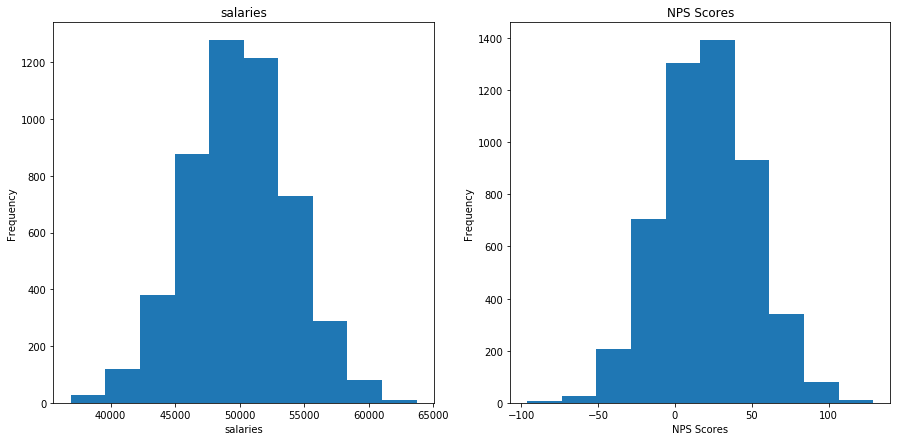

In [45]:
# plot for raw salaries and NPS Score data goes here
fig = plt.figure(figsize = (15, 7))
ax1 = fig.add_subplot(121)
ax1.set_title('salaries')
ax1.set_xlabel('salaries')
ax1.set_ylabel('Frequency')
ax2 = fig.add_subplot(122)
ax2.set_title('NPS Scores')
ax2.set_xlabel('NPS Scores')
ax2.set_ylabel('Frequency')
ax1.hist(df['salaries'], bins = 10)
ax2.hist(df['NPS Score'], bins = 10)
plt.show()

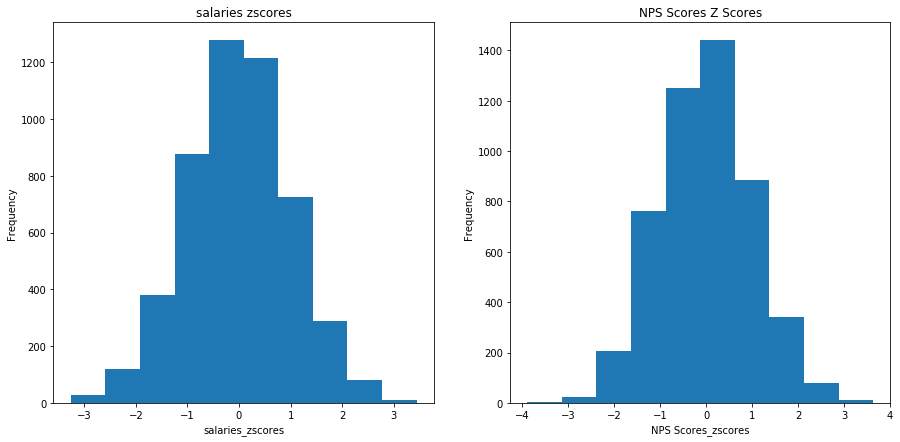

In [47]:
# plot for zscores for salaries and NPS Score data goes here
fig = plt.figure(figsize = (15, 7))
ax1 = fig.add_subplot(121)
ax1.set_title('salaries zscores')
ax1.set_xlabel('salaries_zscores')
ax1.set_ylabel('Frequency')
ax2 = fig.add_subplot(122)
ax2.set_title('NPS Scores Z Scores')
ax2.set_xlabel('NPS Scores_zscores')
ax2.set_ylabel('Frequency')
ax1.hist(df['salaries_zscores'], bins = 10)
ax2.hist(df['NPS Score_zscores'], bins = 10)
plt.show()

# Part 4 - PMF
using the column 'eventOutcomes'

create a PMF and plot the PMF as a bar chart

See image below for referenc

<img src="solutions/images/part4_pmf.png"/>

In [67]:
import collections
counts = collections.Counter(df['eventOutcome'])
total = len(df['eventOutcome'])
print(counts)
pmf = []
for key, val in counts.items():
    pmf.append(round(val/total, 3))
pmf

Counter({4: 666, 7: 661, 3: 636, 0: 624, 6: 622, 1: 608, 2: 592, 5: 591})


[0.122, 0.118, 0.118, 0.125, 0.124, 0.133, 0.127, 0.132]

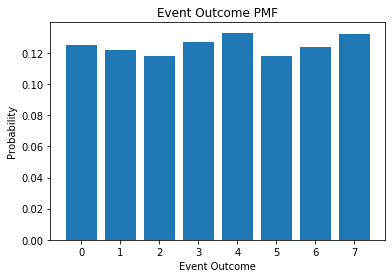

In [68]:
plt.bar(counts.keys(), pmf)
plt.title('Event Outcome PMF')
plt.xlabel('Event Outcome')
plt.ylabel('Probability')
plt.show()

# Part 5 - CDF
plot the CDF of Event Outcomes as a scatter plot using the information above

See image below for reference 

<img src="solutions/images/part5_cmf.png"/>

In [69]:
cdf = []
counter = 0
for x in pmf:
    if len(cdf) >= 1:
        cdf.append(x + cdf[counter])
        counter += 1
    else:
        cdf.append(x)
    
cdf

[0.122, 0.24, 0.358, 0.483, 0.607, 0.74, 0.867, 0.999]

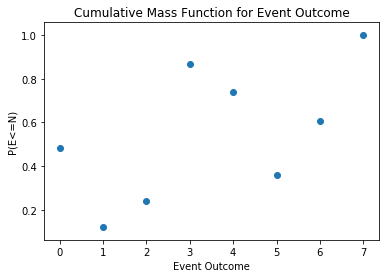

In [71]:
plt.scatter(counts.keys(), cdf)
plt.title('Cumulative Mass Function for Event Outcome')
plt.xlabel('Event Outcome')
plt.ylabel('P(E<=N)')
plt.show()

I feel like that should have worked but dictionaries are apparently dicts

In [108]:
x = list(range(8))
y = []
for k in x:
    y.append(counts[k])
print(y)
proby = []
for item in y:
    proby.append(item/total)
proby

[624, 608, 592, 636, 666, 591, 622, 661]


[0.1248, 0.1216, 0.1184, 0.1272, 0.1332, 0.1182, 0.1244, 0.1322]

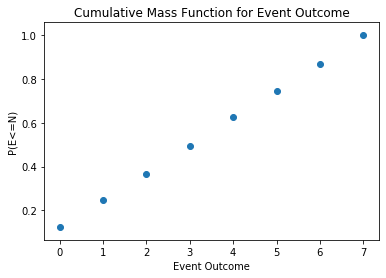

In [109]:
plt.scatter(x, np.cumsum(proby))
plt.title('Cumulative Mass Function for Event Outcome')
plt.xlabel('Event Outcome')
plt.ylabel('P(E<=N)')
plt.show()

# Bonus:
* using np.where find salaries with zscores <= -2.0

* calculate the skewness and kurtosis for the NPS Score column

In [110]:
# find salaries with zscores <= 2.0 
np.where(df['salaries_zscores'] <= 2)

(array([   0,    1,    2, ..., 4997, 4998, 4999], dtype=int64),)

In [115]:
# calculate skewness and kurtosis of NPS Score column
from scipy.stats import kurtosis, skew
print('Skewness of NPS Score =', skew(df['NPS Score']))
print('Kurtosis of NPS Score =', kurtosis(df['NPS Score']))

Skewness of NPS Score = 0.02450527688165856
Kurtosis of NPS Score = -0.04212714461681166


# run the cell below to convert your notebook to a README for assessment

In [116]:
!jupyter nbconvert --to markdown assessment.ipynb && mv assessment.md README.md

[NbConvertApp] Converting notebook assessment.ipynb to markdown
[NbConvertApp] Support files will be in assessment_files\
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Writing 12190 bytes to assessment.md
